In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# 한글폰트오류
from matplotlib import font_manager, rc
font_path = "./malgun.ttf"  # 폰트 파일 위치
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family = font_name)

In [4]:
df = pd.read_csv('seoul.csv')
df.head()

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
0,1907-10-01,108,13.5,7.9,20.7
1,1907-10-02,108,16.2,7.9,22.0
2,1907-10-03,108,16.2,13.1,21.3
3,1907-10-04,108,16.5,11.2,22.0
4,1907-10-05,108,17.6,10.9,25.4


* df_temp에 df 복사

In [5]:
df_temp = df.copy()
df_temp.head()

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
0,1907-10-01,108,13.5,7.9,20.7
1,1907-10-02,108,16.2,7.9,22.0
2,1907-10-03,108,16.2,13.1,21.3
3,1907-10-04,108,16.5,11.2,22.0
4,1907-10-05,108,17.6,10.9,25.4


In [6]:
df_temp = df_temp.drop(['지점'], axis = 1)
df_temp.head()

,날짜,평균기온(℃),최저기온(℃),최고기온(℃)
0,1907-10-01,13.5,7.9,20.7
1,1907-10-02,16.2,7.9,22.0
2,1907-10-03,16.2,13.1,21.3
3,1907-10-04,16.5,11.2,22.0
4,1907-10-05,17.6,10.9,25.4


* '날짜' column을 '연도', '월', '일' column으로 분리

In [7]:
year = []
month = []
day = []

In [8]:
df_temp['날짜'][0].split('-')

['1907', '10', '01']

In [9]:
length = len(df_temp['날짜'])
length

39926

In [10]:
for i in range(0, length) :
    token = df_temp['날짜'][i].split('-')
#     print(token[0], token[1], token[2])
    year.append(int(token[0])) 
    month.append(int(token[1]))
    day.append(int(token[2]))

In [11]:
len(year)

39926

In [12]:
df_temp['연도'] = year
df_temp['월'] = month
df_temp['일'] = day
df_temp.head()

,날짜,평균기온(℃),최저기온(℃),최고기온(℃),연도,월,일
0,1907-10-01,13.5,7.9,20.7,1907,10,1
1,1907-10-02,16.2,7.9,22.0,1907,10,2
2,1907-10-03,16.2,13.1,21.3,1907,10,3
3,1907-10-04,16.5,11.2,22.0,1907,10,4
4,1907-10-05,17.6,10.9,25.4,1907,10,5


* 일교차 column 추가

In [13]:
diff = []
for i in range(0, length) :
    diff.append(df_temp['최고기온(℃)'][i] - df_temp['최저기온(℃)'][i])
    
df_temp['일교차(℃)'] = diff
df_temp.head()

,날짜,평균기온(℃),최저기온(℃),최고기온(℃),연도,월,일,일교차(℃)
0,1907-10-01,13.5,7.9,20.7,1907,10,1,12.8
1,1907-10-02,16.2,7.9,22.0,1907,10,2,14.1
2,1907-10-03,16.2,13.1,21.3,1907,10,3,8.2
3,1907-10-04,16.5,11.2,22.0,1907,10,4,10.8
4,1907-10-05,17.6,10.9,25.4,1907,10,5,14.5


* column의 순서 정리

In [14]:
df_temp = df_temp[['날짜', '연도', '월', '일',
                   '평균기온(℃)', '최고기온(℃)', '최저기온(℃)', '일교차(℃)']]
df_temp.tail()

,날짜,연도,월,일,평균기온(℃),최고기온(℃),최저기온(℃),일교차(℃)
39921,2018-03-24,2018,3,24,7.6,13.1,4.0,9.1
39922,2018-03-25,2018,3,25,9.6,16.9,4.6,12.3
39923,2018-03-26,2018,3,26,11.0,18.1,5.3,12.8
39924,2018-03-27,2018,3,27,13.3,20.0,7.7,12.3
39925,2018-03-28,2018,3,28,14.0,19.0,9.4,9.6


## 데이터 info

In [15]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39926 entries, 0 to 39925
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   날짜       39926 non-null  object 
 1   연도       39926 non-null  int64  
 2   월        39926 non-null  int64  
 3   일        39926 non-null  int64  
 4   평균기온(℃)  39170 non-null  float64
 5   최고기온(℃)  39168 non-null  float64
 6   최저기온(℃)  39169 non-null  float64
 7   일교차(℃)   39168 non-null  float64
dtypes: float64(4), int64(3), object(1)
memory usage: 2.4+ MB


In [16]:
df_temp.isnull().sum()

날짜           0
연도           0
월            0
일            0
평균기온(℃)    756
최고기온(℃)    758
최저기온(℃)    757
일교차(℃)     758
dtype: int64

# 1. 서울이 가장 더웠던 날은 언제였을까?

In [17]:
highest_temp = max(df_temp['최고기온(℃)'])
print(highest_temp)

38.4


In [18]:
highest_row = df_temp[df_temp['최고기온(℃)'] == highest_temp]
highest_row

,날짜,연도,월,일,평균기온(℃),최고기온(℃),최저기온(℃),일교차(℃)
31277,1994-07-24,1994,7,24,33.1,38.4,28.1,10.3


In [19]:
type(highest_row)

pandas.core.frame.DataFrame

In [20]:
# print(highest_row['날짜'])
# print(highest_row['연도'])
# print(highest_row['월'])
# print(highest_row['일'])

highest_year = highest_row['연도'].to_string(index = False)
highest_month = highest_row['월'].to_string(index = False)
highest_day = highest_row['일'].to_string(index = False)

print(highest_year)
print(highest_month)
print(highest_day)

1994
7
24


In [21]:
print(f'서울이 가장 더웠던 날 : {highest_year}년 {highest_month}월 {highest_day}일')

서울이 가장 더웠던 날 : 1994년 7월 24일


# 

# 2. 내 생일의 기온 변화를 그래프로 그려보자

In [22]:
birth_month = 10
birth_day = 4

In [23]:
month_condi = df_temp['월'] == birth_month
df_temp[month_condi].head()

,날짜,연도,월,일,평균기온(℃),최고기온(℃),최저기온(℃),일교차(℃)
0,1907-10-01,1907,10,1,13.5,20.7,7.9,12.8
1,1907-10-02,1907,10,2,16.2,22.0,7.9,14.1
2,1907-10-03,1907,10,3,16.2,21.3,13.1,8.2
3,1907-10-04,1907,10,4,16.5,22.0,11.2,10.8
4,1907-10-05,1907,10,5,17.6,25.4,10.9,14.5


In [24]:
day_condi = df_temp['일'] == birth_day
df_temp[day_condi].head()

,날짜,연도,월,일,평균기온(℃),최고기온(℃),최저기온(℃),일교차(℃)
3,1907-10-04,1907,10,4,16.5,22.0,11.2,10.8
34,1907-11-04,1907,11,4,5.9,13.6,-1.0,14.6
64,1907-12-04,1907,12,4,-1.2,1.3,-2.7,4.0
95,1908-01-04,1908,1,4,-7.5,-1.7,-12.8,11.1
126,1908-02-04,1908,2,4,-7.0,-4.1,-10.3,6.2


In [25]:
df_birth = df_temp[month_condi & day_condi]
df_birth.tail()

,날짜,연도,월,일,평균기온(℃),최고기온(℃),최저기온(℃),일교차(℃)
38289,2013-10-04,2013,10,4,17.4,25.1,10.7,14.4
38654,2014-10-04,2014,10,4,16.9,23.0,11.6,11.4
39019,2015-10-04,2015,10,4,16.6,22.4,11.2,11.2
39385,2016-10-04,2016,10,4,22.0,29.0,15.6,13.4
39750,2017-10-04,2017,10,4,16.7,24.3,10.7,13.6


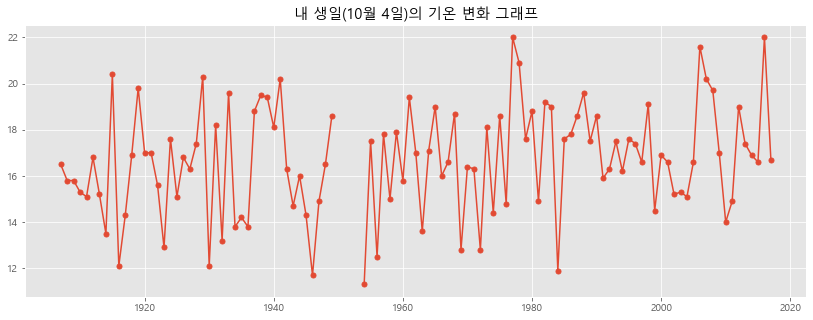

In [26]:
plt.figure(figsize = (14, 5))
plt.style.use('ggplot')
plt.plot(df_birth['연도'], df_birth['평균기온(℃)'], marker = 'o', markersize = 5)
plt.title(f'내 생일({birth_month}월 {birth_day}일)의 기온 변화 그래프')
plt.show()

# 3. 연도별 서울 8월 1일 기온에 대한 누적치 히스토그램 작성

In [27]:
df_temp.head()

,날짜,연도,월,일,평균기온(℃),최고기온(℃),최저기온(℃),일교차(℃)
0,1907-10-01,1907,10,1,13.5,20.7,7.9,12.8
1,1907-10-02,1907,10,2,16.2,22.0,7.9,14.1
2,1907-10-03,1907,10,3,16.2,21.3,13.1,8.2
3,1907-10-04,1907,10,4,16.5,22.0,11.2,10.8
4,1907-10-05,1907,10,5,17.6,25.4,10.9,14.5


In [28]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39926 entries, 0 to 39925
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   날짜       39926 non-null  object 
 1   연도       39926 non-null  int64  
 2   월        39926 non-null  int64  
 3   일        39926 non-null  int64  
 4   평균기온(℃)  39170 non-null  float64
 5   최고기온(℃)  39168 non-null  float64
 6   최저기온(℃)  39169 non-null  float64
 7   일교차(℃)   39168 non-null  float64
dtypes: float64(4), int64(3), object(1)
memory usage: 2.4+ MB


In [29]:
find_month1 = 8
find_day1 = 1

In [30]:
month_condi2 = df_temp['월'] == find_month1
df_temp[month_condi2].head()

,날짜,연도,월,일,평균기온(℃),최고기온(℃),최저기온(℃),일교차(℃)
305,1908-08-01,1908,8,1,26.2,29.6,24.4,5.2
306,1908-08-02,1908,8,2,26.4,30.7,23.3,7.4
307,1908-08-03,1908,8,3,26.9,32.0,24.2,7.8
308,1908-08-04,1908,8,4,26.3,31.5,22.6,8.9
309,1908-08-05,1908,8,5,27.3,32.4,23.6,8.8


In [31]:
day_condi2 = df_temp['일'] == find_day1
df_temp[day_condi2].head()

,날짜,연도,월,일,평균기온(℃),최고기온(℃),최저기온(℃),일교차(℃)
0,1907-10-01,1907,10,1,13.5,20.7,7.9,12.8
31,1907-11-01,1907,11,1,16.1,21.3,11.7,9.6
61,1907-12-01,1907,12,1,-4.6,1.4,-10.5,11.9
92,1908-01-01,1908,1,1,-5.9,-1.3,-9.1,7.8
123,1908-02-01,1908,2,1,-2.2,1.6,-6.4,8.0


In [32]:
df_0801 = df_temp[month_condi2 & day_condi2]
df_0801.head()

,날짜,연도,월,일,평균기온(℃),최고기온(℃),최저기온(℃),일교차(℃)
305,1908-08-01,1908,8,1,26.2,29.6,24.4,5.2
670,1909-08-01,1909,8,1,26.5,32.3,22.3,10.0
1035,1910-08-01,1910,8,1,27.0,32.0,23.5,8.5
1400,1911-08-01,1911,8,1,25.1,31.0,21.7,9.3
1766,1912-08-01,1912,8,1,26.2,31.5,23.7,7.8


In [33]:
df_0801['평균기온(℃)']

305      26.2
670      26.5
1035     27.0
1400     25.1
1766     26.2
         ... 
38225    28.0
38590    30.2
38955    28.2
39321    28.4
39686    28.6
Name: 평균기온(℃), Length: 108, dtype: float64

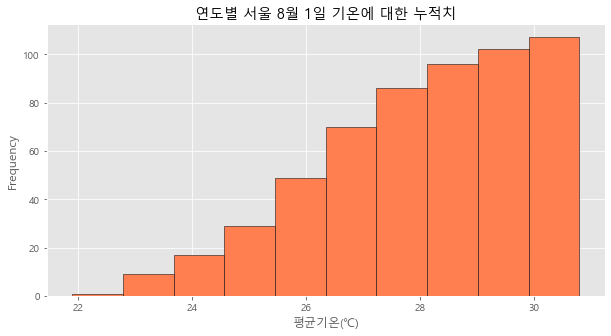

In [68]:
df_0801['평균기온(℃)'].plot(kind = 'hist', bins=10, color='coral', figsize=(10, 5), edgecolor = 'k', cumulative=True)

plt.title(f'연도별 서울 {find_month1}월 {find_day1}일 기온에 대한 누적치')
plt.xlabel('평균기온(℃)')
plt.show()

# 4. 연도별 서울 1월 1일 기온데 대한 누적치 히스토그램 작성

In [35]:
find_month2 = 1
find_day2 = 1

In [36]:
month_condi3 = df_temp['월'] == find_month2
df_temp[month_condi3].head()

,날짜,연도,월,일,평균기온(℃),최고기온(℃),최저기온(℃),일교차(℃)
92,1908-01-01,1908,1,1,-5.9,-1.3,-9.1,7.8
93,1908-01-02,1908,1,2,-7.7,-3.0,-13.9,10.9
94,1908-01-03,1908,1,3,-6.2,-2.9,-10.8,7.9
95,1908-01-04,1908,1,4,-7.5,-1.7,-12.8,11.1
96,1908-01-05,1908,1,5,-4.8,-0.1,-11.3,11.2


In [37]:
day_condi3 = df_temp['일'] == find_day1
df_temp[day_condi2].head()

,날짜,연도,월,일,평균기온(℃),최고기온(℃),최저기온(℃),일교차(℃)
0,1907-10-01,1907,10,1,13.5,20.7,7.9,12.8
31,1907-11-01,1907,11,1,16.1,21.3,11.7,9.6
61,1907-12-01,1907,12,1,-4.6,1.4,-10.5,11.9
92,1908-01-01,1908,1,1,-5.9,-1.3,-9.1,7.8
123,1908-02-01,1908,2,1,-2.2,1.6,-6.4,8.0


In [38]:
df_0101 = df_temp[month_condi3 & day_condi3]
df_0101.head()

,날짜,연도,월,일,평균기온(℃),최고기온(℃),최저기온(℃),일교차(℃)
92,1908-01-01,1908,1,1,-5.9,-1.3,-9.1,7.8
458,1909-01-01,1909,1,1,-7.4,-3.5,-10.8,7.3
823,1910-01-01,1910,1,1,-5.2,0.6,-6.6,7.2
1188,1911-01-01,1911,1,1,-10.1,-6.5,-14.2,7.7
1553,1912-01-01,1912,1,1,-0.8,4.2,-7.3,11.5


In [39]:
plt.rcParams['axes.unicode_minus'] = False

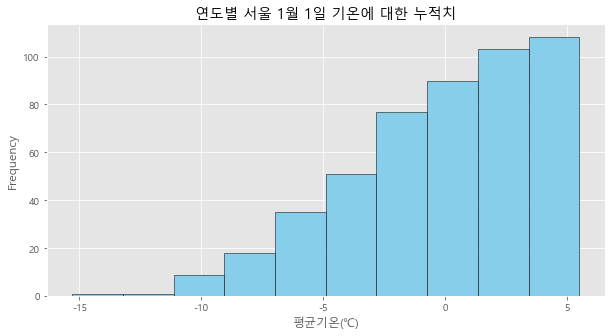

In [40]:
df_0101['평균기온(℃)'].plot(kind = 'hist', bins=10, color='skyblue', figsize=(10, 5), edgecolor = 'k', cumulative=True)

plt.title(f'연도별 서울 {find_month2}월 {find_day2}일 기온에 대한 누적치')
plt.xlabel('평균기온(℃)')
plt.show()

# 연도별 서울 1월/8월 기온에 대한 누적치 히스토그램 작성

In [41]:
Jan = df_temp['월'] == 1
Aug = df_temp['월'] == 8

In [42]:
df_Jan = df_temp[Jan]
df_Jan.head()

,날짜,연도,월,일,평균기온(℃),최고기온(℃),최저기온(℃),일교차(℃)
92,1908-01-01,1908,1,1,-5.9,-1.3,-9.1,7.8
93,1908-01-02,1908,1,2,-7.7,-3.0,-13.9,10.9
94,1908-01-03,1908,1,3,-6.2,-2.9,-10.8,7.9
95,1908-01-04,1908,1,4,-7.5,-1.7,-12.8,11.1
96,1908-01-05,1908,1,5,-4.8,-0.1,-11.3,11.2


In [43]:
df_Aug = df_temp[Aug]
df_Aug.head()

,날짜,연도,월,일,평균기온(℃),최고기온(℃),최저기온(℃),일교차(℃)
305,1908-08-01,1908,8,1,26.2,29.6,24.4,5.2
306,1908-08-02,1908,8,2,26.4,30.7,23.3,7.4
307,1908-08-03,1908,8,3,26.9,32.0,24.2,7.8
308,1908-08-04,1908,8,4,26.3,31.5,22.6,8.9
309,1908-08-05,1908,8,5,27.3,32.4,23.6,8.8


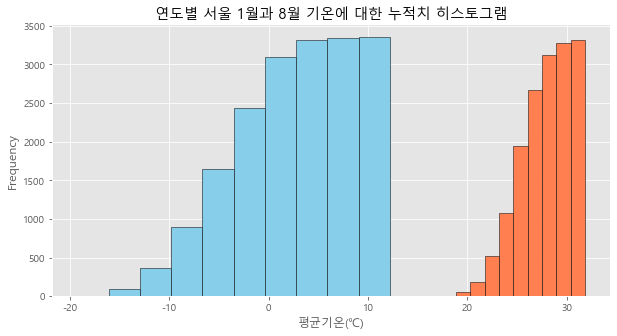

In [44]:
df_Aug['평균기온(℃)'].plot(kind = 'hist', bins = 10, color='coral', figsize=(10, 5), edgecolor = 'k', cumulative=True)
df_Jan['평균기온(℃)'].plot(kind = 'hist', bins = 10, color='skyblue', figsize=(10, 5), edgecolor = 'k', cumulative=True)

plt.title(f'연도별 서울 {find_month2}월과 {find_month1}월 기온에 대한 누적치 히스토그램')
plt.xlabel('평균기온(℃)')
plt.show()

# 앞 예제를 boxplot으로 변환

In [45]:
df_Jan.head()

,날짜,연도,월,일,평균기온(℃),최고기온(℃),최저기온(℃),일교차(℃)
92,1908-01-01,1908,1,1,-5.9,-1.3,-9.1,7.8
93,1908-01-02,1908,1,2,-7.7,-3.0,-13.9,10.9
94,1908-01-03,1908,1,3,-6.2,-2.9,-10.8,7.9
95,1908-01-04,1908,1,4,-7.5,-1.7,-12.8,11.1
96,1908-01-05,1908,1,5,-4.8,-0.1,-11.3,11.2


In [65]:
df_Jan['평균기온(℃)']

92      -5.9
93      -7.7
94      -6.2
95      -7.5
96      -4.8
        ... 
39865   -9.9
39866   -6.3
39867   -8.5
39868   -5.3
39869   -2.6
Name: 평균기온(℃), Length: 3410, dtype: float64

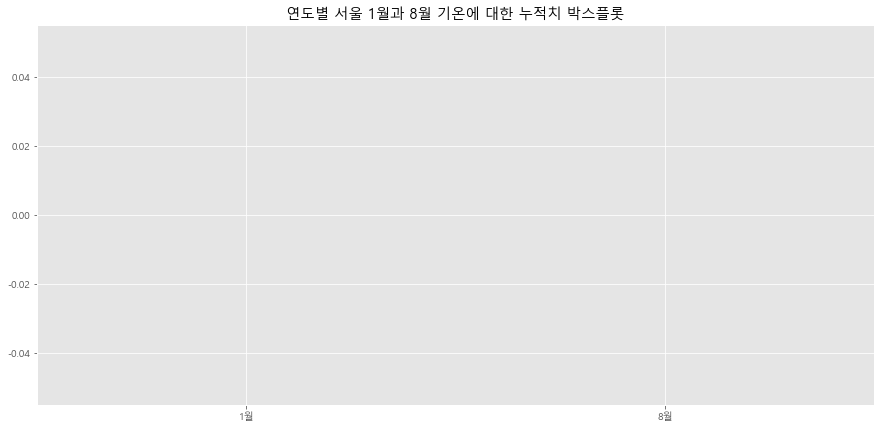

In [66]:
plt.figure(figsize = (15, 7))
plt.boxplot(x = [df_Jan['평균기온(℃)'], df_Aug['평균기온(℃)']], labels = ['1월', '8월'])

plt.title(f'연도별 서울 {find_month2}월과 {find_month1}월 기온에 대한 누적치 박스플롯')
plt.show()

# 월별 기온 데이터 boxplot 작성

# 8월 일별 기온 데이터 boxplot 작성